[Chapter 1] Introducing Time Series

white noise

In [1]:
import os

import numpy as np
np.random.seed()
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

# %pip install git+https://github.com/TimeSynth/TimeSynth.git
# contain all kinds of DGPs(data-generation-process) that can mix and match and create an authentic synthetic time series
import timesynth as ts  
from src.synthetic_ts.autoregressive import AutoRegressive   # updated version by book author due to open issue with ts

def generate_timeseries(signal, noise=None):
    time_sampler = ts.TimeSampler(stop_time=20)
    regular_time_samples = time_sampler.sample_regular_time(num_points=100)
    timeseries = ts.TimeSeries(signal_generator=signal, noise_generator=noise)
    samples, signals, errors = timeseries.sample(regular_time_samples)
    return samples, regular_time_samples, signals, errors

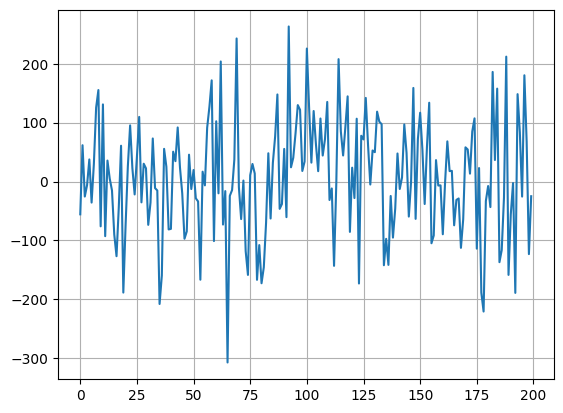

In [53]:
time = np.arange(200)
values = np.random.randn(200)*100

plt.plot(time, values)
plt.grid(True)

red noise

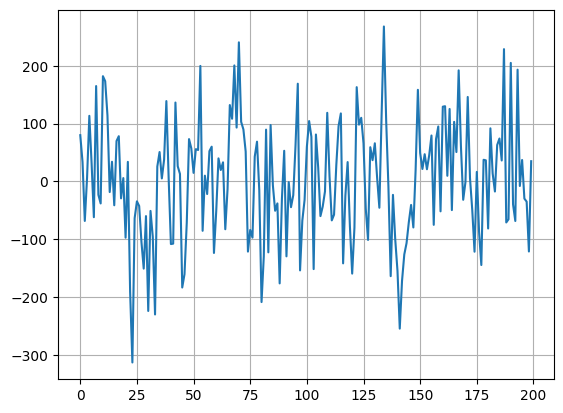

In [54]:
# set the correlation coefficient
r = 0.4
# generate the time axis
time = np.arange(200)
# genrate white noise
white_noise = np.random.randn(200)*100
# red noise by introducing correlation between subsequent values in the white noise
values = np.zeros(200)
for i, v in enumerate(white_noise):
    if i==0:
        values[i] = v
    else:
        values[i] = r*values[i-1] + np.sqrt((1-np.power(r, 2)))*v

plt.plot(time, values)
plt.grid(True)

cyclical and seasonality signals

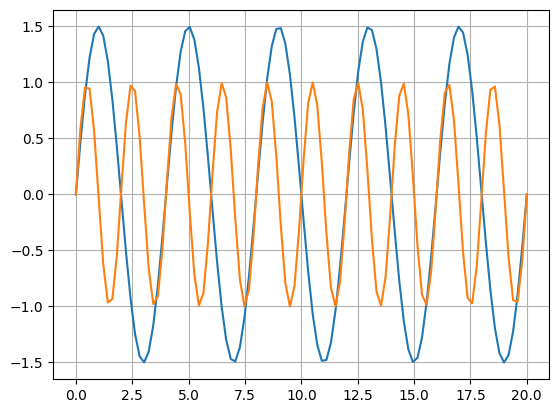

In [55]:
# vanialla sine waves

# sin signal with amplitude = 1.5 and frequency = 0.25
signal_1 = ts.signals.Sinusoidal(amplitude=1.5, frequency=0.25)
# sin signal with amplitude = 1 and frequency = 0.5
signal_2 = ts.signals.Sinusoidal(amplitude=1, frequency=0.5)
# generate the time series
samples_1, regular_time_samples, signals_1, errors_1 = generate_timeseries(signal=signal_1)
samples_2, regular_time_samples, signals_2, errors_2 = generate_timeseries(signal=signal_2)
plt.plot(regular_time_samples, samples_1)
plt.plot(regular_time_samples, samples_2)
plt.grid(True)

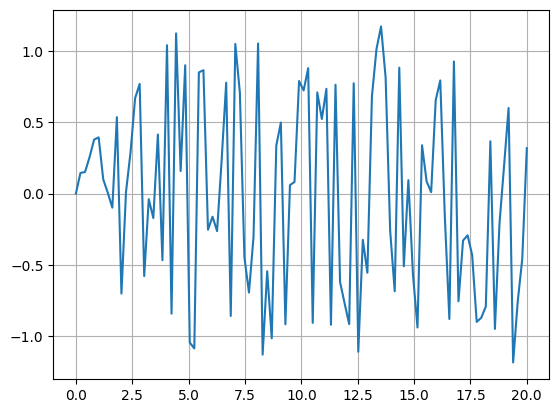

In [56]:
# pseudoPeriodic signal (sine wave with stochasticity)

signal = ts.signals.PseudoPeriodic(amplitude=1, frequency=0.25)
samples, regular_time_samples, signals, errors = generate_timeseries(signal=signal)
plt.plot(regular_time_samples, samples)
plt.grid(True)

autoregressive signals

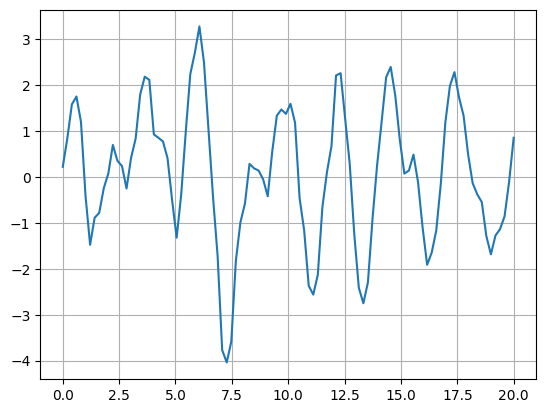

In [57]:
# the value of a time series for the current timestep is dependent on the values of the time series in previous timesteps (serial correlation property)

signal = AutoRegressive(ar_param=[1.5, -0.75])  # y_{t} = 1.5 * y_{t-1} - 0.75 * y_{t-2}
samples, regular_time_samples, signals, errors = generate_timeseries(signal=signal)
plt.plot(regular_time_samples, samples)
plt.grid(True)

mix and match

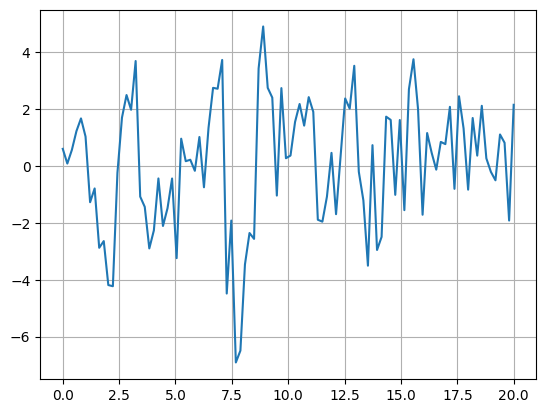

In [58]:
# generate pseudo periodic signal (with white noise)
pseudo_samples, regular_time_samples, _, _ = \
    generate_timeseries(signal=ts.signals.PseudoPeriodic(amplitude=1, frequency=0.25), noise=ts.noise.GaussianNoise(std=0.3))

# generate autoregressive signal
ar_samples, regular_time_samples, _, _ = generate_timeseries(signal=AutoRegressive(ar_param=[1.5, -0.75]))

# combine the two signals using mathematical equation
samples = pseudo_samples*2 + ar_samples

# plot
plt.plot(regular_time_samples, samples)
plt.grid(True)

non-stationary time series - change in mean over time

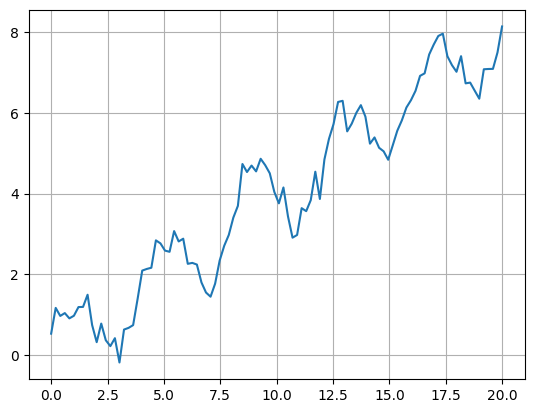

In [59]:
# sine signal with amplitude = 1 and frequency = 0.25
signal = ts.signals.Sinusoidal(amplitude=1, frequency=0.25)
# white noise wih std = 0.3
noise = ts.noise.GaussianNoise(std=0.3)
# generate the time series
sinusoidal_samples, regular_time_samples, _, _ = generate_timeseries(signal=signal, noise=noise)
# regular_time_samples is a linear increasing time axis and can be used as a trend
trend = regular_time_samples * 0.4
# combine the signal and the trend
samples = sinusoidal_samples + trend
# plot
plt.plot(regular_time_samples, samples)
plt.grid(True)

non-stationary time series - change in variance over the time (heteroscedasticity)

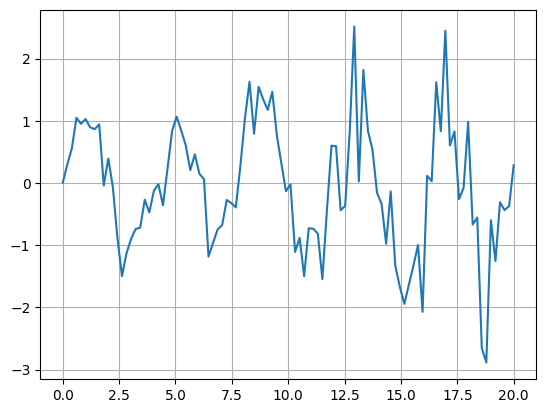

In [90]:
# sine signal
sinusoidal_samples, regular_time_samples, _, _ = generate_timeseries(signal=ts.signals.Sinusoidal(amplitude=1, frequency=0.25))
# time varying noise
noise = [8*np.random.normal(loc=0.0, scale=0.01*np.sqrt(i+1)) for i, v in enumerate(regular_time_samples)]
# combine the sine signal with noise
samples = sinusoidal_samples + noise
# plot
plt.plot(regular_time_samples, samples)
plt.grid(True)